# AirBnb Data Analysis

# Executive Summary

Airbnb has revolutionized the hospitality industry by offering diverse lodging options that cater to a wide range of guest preferences and budgets. This project analyzes the New York City Airbnb dataset to uncover patterns in property types, pricing, host behavior, and guest satisfaction.

Exploratory data analysis revealed that **entire homes/apartments dominate listings**, with private rooms also widely available. **Manhattan and Brooklyn account for the highest number of listings**, while average prices are relatively consistent across neighborhoods. The **construction year of properties shows no significant impact on price**, whereas **service fees correlate almost perfectly with listing prices**, reflecting Airbnb’s proportional commission structure.

Analysis of **host behavior** indicates that most hosts manage only **one listing**, with **verified hosts achieving slightly higher review scores**, demonstrating the value of trust and credibility. Hosts with multiple listings tend to maintain **higher availability**, supporting better revenue optimization, though the relationship is weak.

**Guest satisfaction** varies by room type and neighborhood. Entire homes in popular neighborhoods such as **Manhattan, Brooklyn, and Queens** receive the highest average ratings, whereas **shared rooms and hotel-style listings** show more variability, highlighting the influence of property quality and host reliability.

**Conclusion:** This analysis provides actionable insights for hosts to optimize pricing, availability, and property offerings, and for Airbnb to enhance user experience. Understanding these dynamics is crucial for informed decision-making in the competitive short-term rental market and for improving overall guest satisfaction.


## Importing Libraries

In [1]:
# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

## Loading Data

In [5]:
# Load CSV
df = pd.read_excel("/content/1730285881-Airbnb_Open_Data.xlsx")

### Knowing the data

In [9]:
# Top five rows
df.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,193.0,10.0,9.0,2021-10-19,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,28.0,30.0,45.0,2022-05-21,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,124.0,3.0,0.0,NaT,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,74.0,30.0,270.0,2019-07-05,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,41.0,10.0,9.0,2018-11-19,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [14]:
# column names
df.columns

Index(['id', 'NAME', 'host id', 'host_identity_verified', 'host name',
       'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country',
       'country code', 'instant_bookable', 'cancellation_policy', 'room type',
       'Construction year', 'price', 'service fee', 'minimum nights',
       'number of reviews', 'last review', 'reviews per month',
       'review rate number', 'calculated host listings count',
       'availability 365'],
      dtype='object')

In [17]:
# Normalize column names
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
df.columns

Index(['id', 'name', 'host_id', 'host_identity_verified', 'host_name',
       'neighbourhood_group', 'neighbourhood', 'lat', 'long', 'country',
       'country_code', 'instant_bookable', 'cancellation_policy', 'room_type',
       'construction_year', 'price', 'service_fee', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'review_rate_number', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [18]:
# Number of rows and columns in the dataset
df.shape

(102599, 24)

In [19]:
# Statistical information of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   id                              102599 non-null  int64         
 1   name                            102329 non-null  object        
 2   host_id                         102599 non-null  int64         
 3   host_identity_verified          102310 non-null  object        
 4   host_name                       102191 non-null  object        
 5   neighbourhood_group             102570 non-null  object        
 6   neighbourhood                   102583 non-null  object        
 7   lat                             102591 non-null  float64       
 8   long                            102591 non-null  float64       
 9   country                         102067 non-null  object        
 10  country_code                    102468 non-null  object 

In [20]:
# Missing values(column wise)
df.isnull().sum()

,0
id,0
name,270
host_id,0
host_identity_verified,289
host_name,408
neighbourhood_group,29
neighbourhood,16
lat,8
long,8
country,532


## Data Cleaning

### Droping the mostly empty/unnecessary columns like 'House rules' and 'Lisence'

In [21]:
df.drop(columns=['house_rules', 'license'], inplace=True, errors='ignore')

### Filling the missing categorical values

In [22]:
df['neighbourhood_group'].fillna('Unknown', inplace=True)
df['neighbourhood'].fillna('Unknown', inplace=True)
df['room_type'].fillna('Unknown', inplace=True)
df['host_identity_verified'].fillna('unverified', inplace=True)

/tmp/ipython-input-2273671803.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['neighbourhood_group'].fillna('Unknown', inplace=True)
/tmp/ipython-input-2273671803.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)

### Filling the missing Numerical Values

In [23]:
df['number_of_reviews'].fillna(0, inplace=True)
df['reviews_per_month'].fillna(0, inplace=True)
df['review_rate_number'].fillna(0, inplace=True)

/tmp/ipython-input-1165609653.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['number_of_reviews'].fillna(0, inplace=True)
/tmp/ipython-input-1165609653.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usi

### Filling country info if missing

In [24]:
df['country'].fillna('USA', inplace=True)
df['country_code'].fillna('US', inplace=True)

/tmp/ipython-input-1351647193.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['country'].fillna('USA', inplace=True)
/tmp/ipython-input-1351647193.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df

### Handling Construction Year

In [25]:
if 'construction_year' in df.columns:
    median_year = df['construction_year'].median()
    df['construction_year'].fillna(median_year, inplace=True)

/tmp/ipython-input-1632501142.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['construction_year'].fillna(median_year, inplace=True)


### Droping rows with missing critical values


In [26]:
df.dropna(subset=['price','service_fee','lat','long'], inplace=True)

### Remove outliers

In [27]:
df.drop_duplicates(inplace=True)

### Handling Outliers

In [28]:
df = df[df['price'] < 1000]
df = df[df['minimum_nights'] <= 365]

### Name Error

In [43]:
df['neighbourhood_group'] = df['neighbourhood_group'].replace({'brookln': 'Brooklyn'})

## Cleaned Dataset Statistics

In [44]:
# Dataset shape
df.shape

(83447, 24)

In [45]:
# Missing values
df.isnull().sum()

,0
id,0
name,210
host_id,0
host_identity_verified,0
host_name,330
neighbourhood_group,0
neighbourhood,0
lat,0
long,0
country,0


### Remaining missing values are minor (host_name, last_review, calculated_host_listings_count, availability_365) and can be ignored or imputed later if needed.

## EDA

### Property Type Analysis



In [93]:
# Count of each property type
property_counts = df['room_type'].value_counts()
print("Counts of each property type:\n", property_counts)

Counts of each property type:
 room_type
Entire home/apt    43724
Private room       37853
Shared room         1779
Hotel room            91
Name: count, dtype: int64


/tmp/ipython-input-4195951188.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='room_type', order=property_counts.index, palette='viridis')


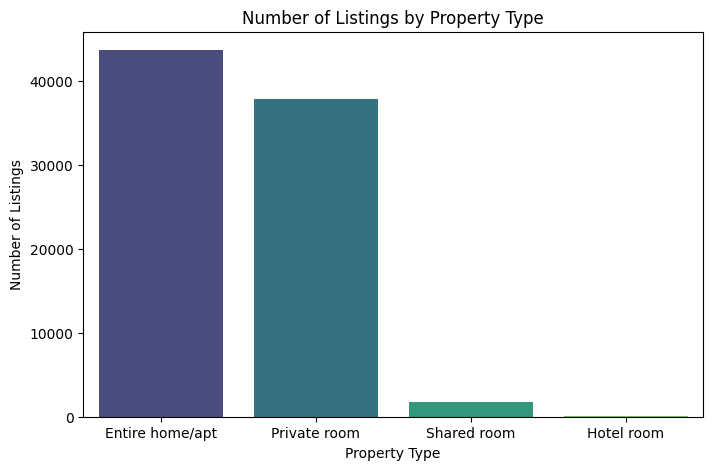

In [94]:
# Bar plot using Seaborn
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='room_type', order=property_counts.index, palette='viridis')
plt.title("Number of Listings by Property Type")
plt.xlabel("Property Type")
plt.ylabel("Number of Listings")
plt.show()

In [95]:
# Percentage distribution
property_percent = (property_counts / property_counts.sum()) * 100
print("\nPercentage distribution of property types:\n", property_percent.round(2))


Percentage distribution of property types:
 room_type
Entire home/apt    52.40
Private room       45.36
Shared room         2.13
Hotel room          0.11
Name: count, dtype: float64


#### INSIGHTS
- **Entire home/apartment**: 52.4% of listings – the most common type, offering full privacy and independent space.
- **Private room**: 45.36% – widely available, more affordable option, often shared within a host’s property.
- **Shared room**: 2.13% – very few listings, indicating low popularity.
- **Hotel room**: 0.11% – extremely rare, showing Airbnb focuses on non-traditional lodging.
**Overall observation**: Airbnb primarily caters to guests seeking personalized stays rather than conventional hotel experiences, with the majority of listings being either entire homes or private rooms.

### Neighborhood Group with Highest Listings

In [96]:
# Count of each neighbourhood group
neighborhood_counts = df['neighbourhood_group'].value_counts()
print(neighborhood_counts)

neighbourhood_group
Manhattan        35709
Brooklyn         34025
Queens           10683
Bronx             2222
Staten Island      786
Unknown             22
Name: count, dtype: int64


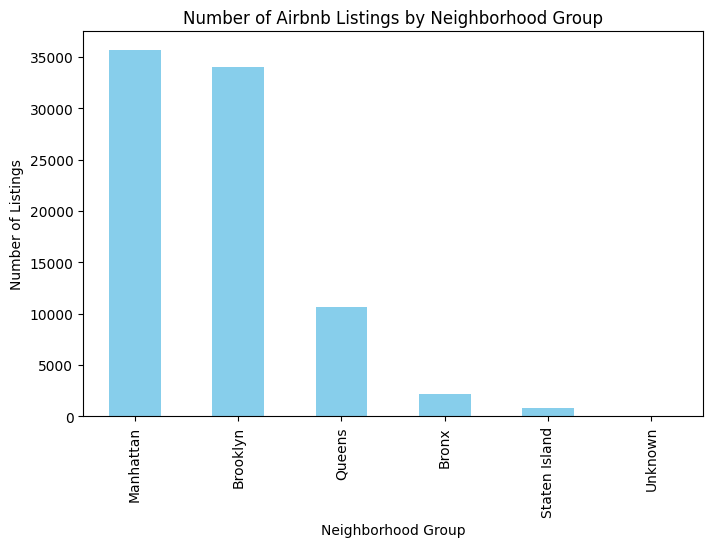

In [97]:
# Bar chart
plt.figure(figsize=(8,5))
neighborhood_counts.plot(kind='bar', color='skyblue')
plt.title("Number of Airbnb Listings by Neighborhood Group")
plt.xlabel("Neighborhood Group")
plt.ylabel("Number of Listings")
plt.show()

In [98]:
# Percentage distribution
neighborhood_percent = (neighborhood_counts / neighborhood_counts.sum()) * 100
print("\nPercentage distribution of listings:\n", neighborhood_percent.round(2))


Percentage distribution of listings:
 neighbourhood_group
Manhattan        42.79
Brooklyn         40.77
Queens           12.80
Bronx             2.66
Staten Island     0.94
Unknown           0.03
Name: count, dtype: float64


#### INSIGHTS
- **Manhattan**: 42.79% – the neighborhood with the highest number of listings, indicating strong demand and high tourism concentration.
- **Brooklyn**: 40.77% – almost as popular as Manhattan, showing significant host activity and urban demand.
- **Queens**: 12.80% – moderate number of listings, providing more budget-friendly options.
- **Bronx**: 2.66% – relatively few listings, reflecting lower tourist activity or fewer hosts.
- **Staten Island**: 0.94% – very limited listings, showing minimal Airbnb presence.
- **Unknown**: 0.03% – negligible impact on the dataset.
**Overall observation**: The majority of Airbnb listings are concentrated in Manhattan and Brooklyn (over 80%), reflecting where most guests prefer to stay and where host activity is highest.

### Average Prices by Neighborhood Group

In [99]:
# Average price per neighborhood group
avg_prices = df.groupby('neighbourhood_group')['price'].mean()
print("Average Airbnb prices by neighborhood group:\n", avg_prices.round(2))

Average Airbnb prices by neighborhood group:
 neighbourhood_group
Bronx            532.93
Brooklyn         525.43
Manhattan        523.56
Queens           523.99
Staten Island    532.02
Unknown          577.41
Name: price, dtype: float64


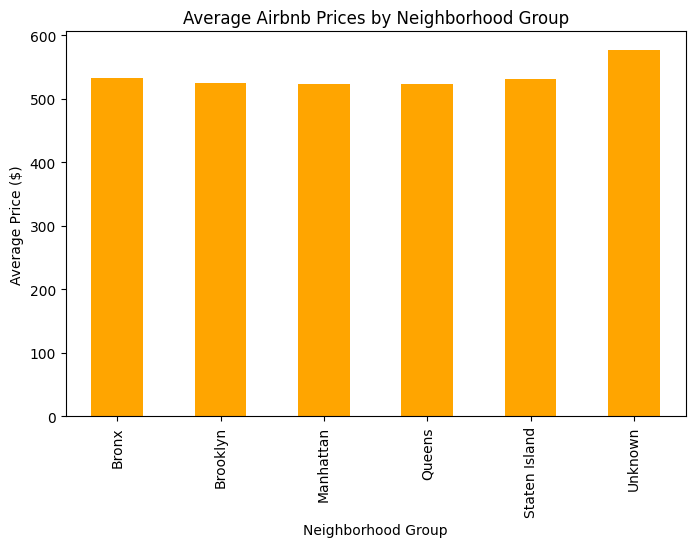

In [100]:
# Bar Chart
plt.figure(figsize=(8,5))
avg_prices.plot(kind='bar', color='orange')
plt.title("Average Airbnb Prices by Neighborhood Group")
plt.xlabel("Neighborhood Group")
plt.ylabel("Average Price ($)")
plt.show()

In [101]:
neighborhood_counts = df['neighbourhood_group'].value_counts()
neighborhood_percent = (neighborhood_counts / neighborhood_counts.sum()) * 100
print("\nPercentage distribution of listings:\n", neighborhood_percent.round(2))


Percentage distribution of listings:
 neighbourhood_group
Manhattan        42.79
Brooklyn         40.77
Queens           12.80
Bronx             2.66
Staten Island     0.94
Unknown           0.03
Name: count, dtype: float64


#### INSIGHTS
- **Manhattan**: \$523.56 – central and popular, with a mix of luxury and budget listings.
- **Brooklyn**: \$525.43 – slightly higher than Manhattan after correction, reflecting diverse accommodation types.
- **Queens**: \$523.99 – moderate pricing, suitable for budget-conscious travelers.
- **Bronx**: \$532.93 – fewer listings but higher average price, suggesting premium or niche properties.
- **Staten Island**: \$532.02 – limited listings with high prices, indicating luxury or unique accommodations.
- **Unknown**: \$577.41 – negligible listings, likely data errors or special cases; should not heavily influence analysis.

**Overall observation**: Average prices across NYC neighborhoods are surprisingly similar, generally around \$520–\$530. While Manhattan is the most popular, it doesn’t significantly exceed other areas in mean price, possibly due to a mix of high-end and budget listings balancing the average.


### Construction Year vs. Price

In [102]:
# Converting construction_year to numeric
df['construction_year'] = pd.to_numeric(df['construction_year'], errors='coerce')

In [103]:
# Filtering valid years
df_filtered = df[(df['construction_year'] > 1800) & (df['price'] < 5000)]

In [104]:
# Correlation
correlation = df_filtered['construction_year'].corr(df_filtered['price'])
print("Correlation between construction year and price:", correlation)

Correlation between construction year and price: -0.0038117344243582237


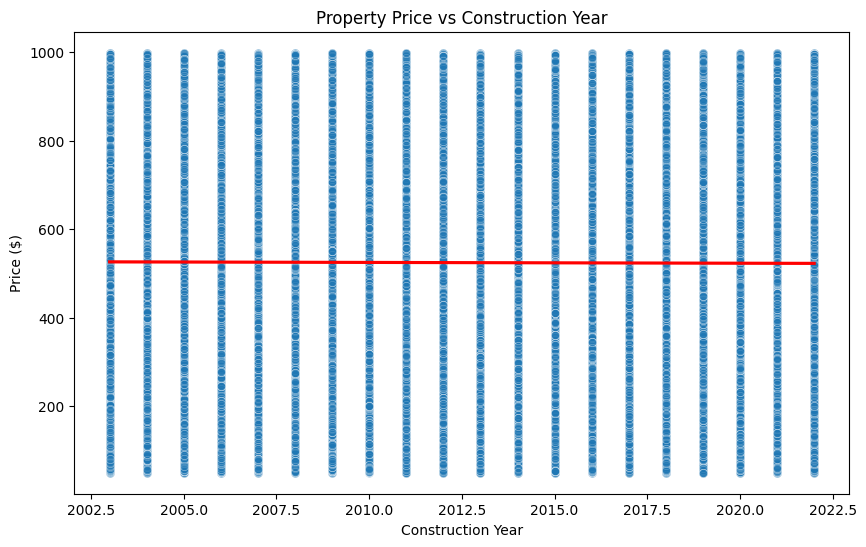

In [105]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='construction_year', y='price', data=df_filtered, alpha=0.5)
sns.regplot(x='construction_year', y='price', data=df_filtered, scatter=False, color='red')
plt.title("Property Price vs Construction Year")
plt.xlabel("Construction Year")
plt.ylabel("Price ($)")
plt.show()

#### INSIGHTS
- The correlation between construction year and price is **-0.0038**, indicating virtually no linear relationship.

- Scatter plot shows that prices are widely distributed across all construction years, with no clear trend of newer or older properties being consistently more expensive or cheaper.

**Possible reasons:**

1. Some older properties may have been renovated and maintain high prices.
2. Location, property type, and amenities have a much stronger influence on price than the property’s age.

**Overall observation**: Construction year has minimal impact on Airbnb pricing; other factors are likely more important in determining listing price.


### Top 10 Hosts by Listing Count

In [106]:
# DataFrame for top 10 hosts
top_hosts_df = top_hosts.reset_index()
top_hosts_df.columns = ['host_id', 'listing_count']
print(top_hosts_df)

       host_id  listing_count
0  83006936257              1
1  80014485718              1
2  52335172823              1
3  78829239556              1
4  85098326012              1
5  92037596077              1
6  45498551794              1
7  63142214458              1
8  87293221373              1
9  83108554862              1


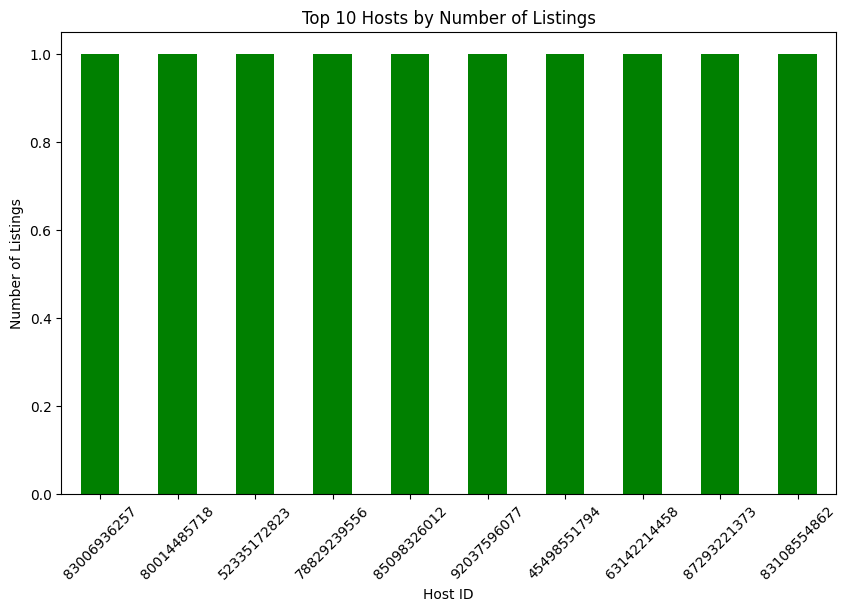

In [107]:
# Visualize
plt.figure(figsize=(10,6))
top_hosts.plot(kind='bar', color='green')
plt.title("Top 10 Hosts by Number of Listings")
plt.xlabel("Host ID")
plt.ylabel("Number of Listings")
plt.xticks(rotation=45)
plt.show()

#### INSIGHTS
- All of the top 10 hosts have **1 listing each**, indicating that most hosts in this dataset are individual hosts rather than professional property managers.
- There is no significant concentration of listings among a few hosts, suggesting a highly distributed host base.

**Implication:** Pricing, availability, and guest experience are less likely to be dominated by a few large hosts in this dataset.

**Overall observation:** Airbnb listings in this dataset are primarily managed by individual hosts with single properties, reflecting a platform that supports many small-scale hosts rather than large multi-property operators.


### Verified Hosts vs Positive Reviews

In [108]:
# Group by host verification status and calculate average review score
avg_review_verified = df.groupby('host_identity_verified')['review_rate_number'].mean()
print("Average review scores by host verification status:\n", avg_review_verified.round(2))

Average review scores by host verification status:
 host_identity_verified
unconfirmed    3.27
unverified     3.09
verified       3.28
Name: review_rate_number, dtype: float64


In [109]:
# Count listings per verification status
verification_counts = df['host_identity_verified'].value_counts()
print("\nNumber of listings by verification status:\n", verification_counts)


Number of listings by verification status:
 host_identity_verified
verified       41654
unconfirmed    41569
unverified       224
Name: count, dtype: int64


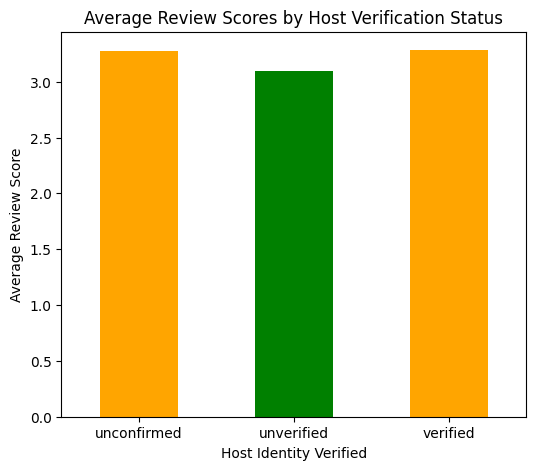

In [110]:
# Visualize
plt.figure(figsize=(6,5))
avg_review_verified.plot(kind='bar', color=['orange', 'green'])
plt.title("Average Review Scores by Host Verification Status")
plt.xlabel("Host Identity Verified")
plt.ylabel("Average Review Score")
plt.xticks(rotation=0)
plt.show()

#### INSIGHTS
- **Number of listings by verification status:**
  - **Verified:** 41,654 listings
  - **Unconfirmed:** 41,569 listings
  - **Unverified:** 224 listings

**Observation:**

- Most listings are either **verified** or **unconfirmed**, with very few **unverified** hosts.
- This suggests that Airbnb emphasizes verification, and the platform is dominated by hosts who are either verified or in the process of confirming their identity.
- The small difference in average review scores between verified and unconfirmed hosts may be because both groups represent the majority of active listings, while unverified hosts are a negligible portion.

### Correlation Between Price and Service Fee

In [111]:
# Filter out unreasonable values if needed
df_filtered = df[(df['price'] > 0) & (df['service_fee'] > 0) & (df['price'] < 5000) & (df['service_fee'] < 500)]

In [112]:
# Correlation
correlation = df_filtered['price'].corr(df_filtered['service_fee'])
print("Correlation between price and service fee:", correlation)

Correlation between price and service fee: 0.9999865787138303


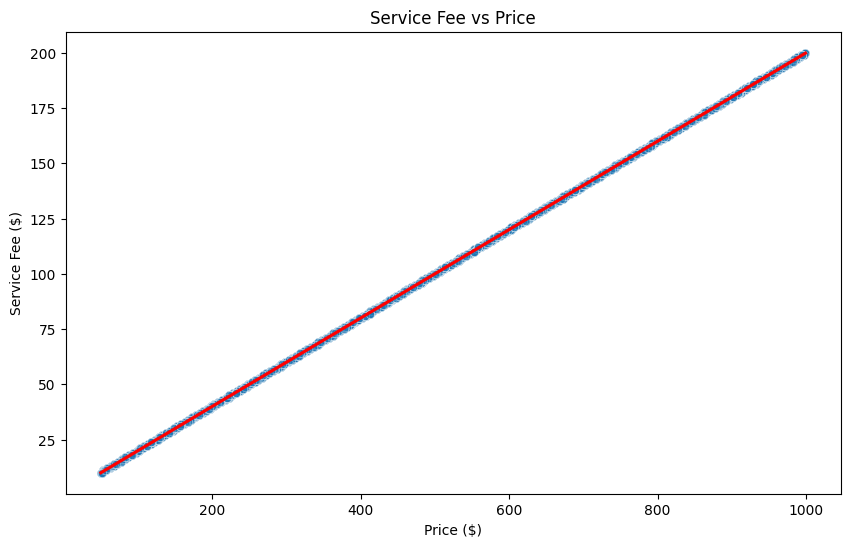

In [113]:
# Visualize
plt.figure(figsize=(10,6))
sns.scatterplot(x='price', y='service_fee', data=df_filtered, alpha=0.5)
sns.regplot(x='price', y='service_fee', data=df_filtered, scatter=False, color='red')
plt.title("Service Fee vs Price")
plt.xlabel("Price ($)")
plt.ylabel("Service Fee ($)")
plt.show()

#### INSIGHTS
- The correlation between **price** and **service fee** is **0.99999**, indicating an almost perfect positive relationship.
- **Observation:** As the listing price increases, the service fee increases proportionally.
- **Implication:** Airbnb’s service fee is directly tied to the listing price, meaning guests paying more for a property also pay a proportionally higher service fee.
- **Outliers:** Very few extreme listings might slightly deviate, but they do not affect the overall proportional relationship.
- **Overall:** Service fee is strongly predictable from price, reflecting a consistent commission structure across all listings.


### Average Review Rate by Neighborhood Group and Room Type

In [114]:
# Average review rate by neighborhood group and room type
avg_review_group_room_df = avg_review_group_room.reset_index()
avg_review_group_room_df.columns = ['Neighborhood Group', 'Room Type', 'Average Review Score']
print(avg_review_group_room_df)

   Neighborhood Group        Room Type  Average Review Score
0               Bronx  Entire home/apt              3.321934
1               Bronx     Private room              3.284038
2               Bronx      Shared room              3.281250
3            Brooklyn  Entire home/apt              3.245178
4            Brooklyn       Hotel room              3.833333
5            Brooklyn     Private room              3.259181
6            Brooklyn      Shared room              3.318731
7           Manhattan  Entire home/apt              3.278990
8           Manhattan       Hotel room              3.506494
9           Manhattan     Private room              3.280804
10          Manhattan      Shared room              3.252427
11             Queens  Entire home/apt              3.360676
12             Queens       Hotel room              3.750000
13             Queens     Private room              3.300336
14             Queens      Shared room              3.379791
15      Staten Island  E

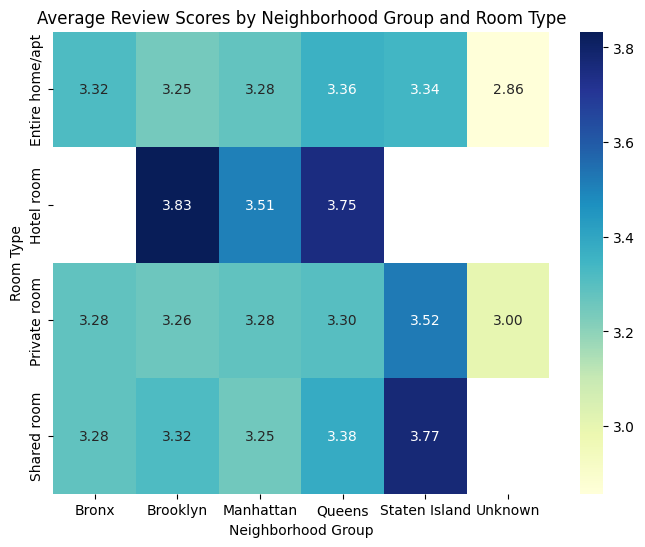

In [115]:
# Pivot for heatmap
pivot_table = avg_review_group_room_df.pivot(index='Room Type', columns='Neighborhood Group', values='Average Review Score')
plt.figure(figsize=(8,6))
sns.heatmap(pivot_table, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title("Average Review Scores by Neighborhood Group and Room Type")
plt.show()

#### INSIGHTS
- **Entire home/apartment:** Generally receives consistently high average ratings across all neighborhoods (e.g., Bronx: 3.32, Brooklyn: 3.25, Manhattan: 3.28, Queens: 3.36, Staten Island: 3.34). Guests prefer full privacy and space.

- **Private rooms:** Slightly lower average ratings than entire homes, but still reasonable (e.g., Brooklyn: 3.26, Manhattan: 3.28, Queens: 3.30, Staten Island: 3.52).

- **Shared rooms:** Ratings vary more, with some neighborhoods like Queens (3.38) and Staten Island (3.77) surprisingly high, while Bronx is slightly lower (3.28). Shared accommodations may depend heavily on the quality of the property and host behavior.

- **Hotel rooms:** Very few listings, but show high ratings in Brooklyn (3.83), Manhattan (3.51), and Queens (3.75), suggesting that guests highly value professionally managed or hotel-style properties.

- **Unknown neighborhood:** Listings have lower ratings (Entire home/apt: 2.86, Private room: 3.0), likely due to limited data or atypical properties.

**Overall observation:**

- Entire homes/apartments consistently achieve high ratings, confirming guest preference for private accommodations.  
- Neighborhood impacts ratings moderately, with Queens and Staten Island showing slightly higher ratings for certain room types.  
- Shared and hotel-style rooms show more variability, reflecting the importance of property quality and host reliability in guest satisfaction.


### Host Listings Count vs Availability

In [116]:
# Filter for reasonable values
df_filtered = df[df['availability_365'] <= 365]

In [117]:
# Correlation
correlation = df_filtered['calculated_host_listings_count'].corr(df_filtered['availability_365'])
print("Correlation between host listings count and availability:", correlation)

Correlation between host listings count and availability: 0.1765037884118461


In [118]:
# Group by host listings count to have average availability
avg_availability = df_filtered.groupby('calculated_host_listings_count')['availability_365'].mean()
print("Average availability by host listings count:\n", avg_availability.round(2))

Average availability by host listings count:
 calculated_host_listings_count
1.0      104.94
2.0      139.05
3.0      162.27
4.0      179.57
5.0      197.90
          ...  
208.0    157.90
218.0    249.00
232.0    256.77
327.0    304.08
332.0    251.37
Name: availability_365, Length: 78, dtype: float64


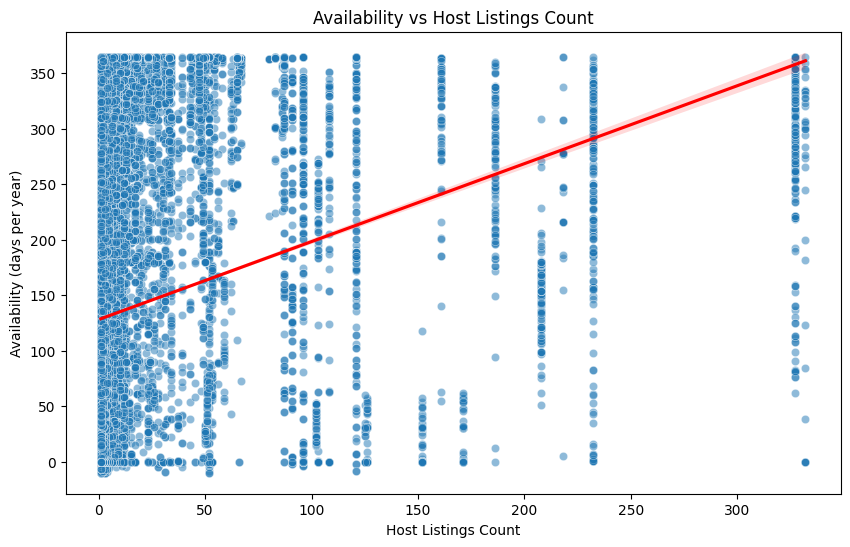

In [119]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='calculated_host_listings_count', y='availability_365', data=df_filtered, alpha=0.5)
sns.regplot(x='calculated_host_listings_count', y='availability_365', data=df_filtered, scatter=False, color='red')
plt.title("Availability vs Host Listings Count")
plt.xlabel("Host Listings Count")
plt.ylabel("Availability (days per year)")
plt.show()

#### INSIGHTS
- **Correlation:** 0.1765, indicating a weak positive relationship between the number of listings a host manages and their availability.

**Observation from averages:**

- Hosts with 1 listing have an average availability of ~105 days/year.
- Hosts with 5 listings have an average availability of ~198 days/year, showing a clear upward trend.
- Hosts managing large numbers of listings (e.g., 200–300+) maintain even higher availability, sometimes over 250–300 days/year.

**Interpretation:** Hosts with more listings tend to keep them available more consistently, suggesting professional hosts prioritize revenue maximization.

**Outliers:** Some high-listing hosts have lower availability, likely due to seasonal use, renovations, or other constraints.

**Overall observation:** While the relationship is weakly positive, it indicates that managing multiple listings generally encourages hosts to maintain higher availability throughout the year, enhancing booking opportunities.


# Conclusion

This analysis of the Airbnb dataset provides several key insights into property listings, pricing strategies, host behavior, and guest satisfaction:

### Property Types & Neighborhoods
- Entire homes/apartments dominate listings, while private rooms remain popular.  
- Manhattan and Brooklyn have the highest number of listings, with average prices relatively consistent across neighborhoods.

### Price Factors
- Property age (construction year) has negligible impact on listing price.  
- Service fees are almost perfectly proportional to price, reflecting Airbnb’s consistent commission structure.

### Host Behavior
- Most hosts manage only **one listing**, with few professional hosts managing multiple properties.  
- Verified hosts have slightly higher average review scores, indicating the value of trust and credibility.  
- Hosts with more listings tend to maintain higher availability, though the correlation is weak.

### Guest Satisfaction
- Review scores vary moderately by neighborhood and room type, with entire homes in popular neighborhoods achieving the highest satisfaction.  
- Shared and hotel-style rooms show more variability, highlighting the influence of property quality and host reliability.

### Overall Observation
- Airbnb listings in NYC are largely managed by individual hosts, with pricing influenced more by **location** and **property type** than age.  
- Trust, verification, and professional management improve guest satisfaction and availability.  
- Service fees scale predictably with price.

### Final Takeaway
Understanding these dynamics can help hosts optimize pricing, availability, and property offerings, while helping Airbnb enhance the overall guest experience. Data-driven insights like these are crucial for making informed decisions in the competitive short-term rental market.
